In [1]:
import pandas as pd
import copy
import math
import numpy as np
import enum 

import networkx as nx
from networkx.convert_matrix import from_numpy_array

from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.decomposition import PCA

import scipy.spatial.distance
import scipy.stats as stats
from scipy.stats import pearsonr
from scipy.stats import kurtosis, skew

import matplotlib.pyplot as plt

import pylab

In [2]:
cell_data = pd.read_csv('cell_data.tsv', sep='\t')
cell_data.rename(columns={cell_data.columns[0]: 'cellID'}, inplace=True)
cell_data

,cellID,Timm21,Csf1,Oxnad1,Ace,Nr6a1,6720489N17Rik,Utp18,Ccdc107,Tspyl4,...,Parn,Ttf2,Pet100,Sp140,Ccdc166,Ralgapa1,Adarb2,Dnah5,Sertad3,Iqcd
0,180224,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,180225,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,180226,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,180227,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,172036,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4867,172027,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4868,172028,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4869,180212,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4870,180213,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [3]:
# pravi matricu susedstva grafa 
# data_dict[celija] = (x,y) ili data_dict[celija] = redukovane genske ekspresije
# cells = [id_celije_1, ... , id_celije_n]
def adjacency_matrix(data_dict, cells):
    n = len(cells)
    adjacency_matrix = np.zeros(shape=(n, n))

    for i in range(0, n - 1):
        for j in range(i + 1, n):
            adjacency_matrix[i][j] = scipy.spatial.distance.euclidean(data_dict[cells[i]], data_dict[cells[j]])
            adjacency_matrix[j][i] = adjacency_matrix[i][j]

    return adjacency_matrix

In [4]:
cell_dict = {}
cells = []

# cell_dict ce sadrzati koordinate celija (cvorova) 
# cells je lista id-eva svih celija
for index, row in cell_data.iterrows():
    cell_dict[row['cellID']] = (row['x'], row['y'])
    cells.append(row['cellID'])

In [5]:
adjacency_matrix_1 = adjacency_matrix(cell_dict, cells)

In [6]:
# Redukcija dimenzionalnosti genskih ekspresija pomocu PCA metode
gene_exp = cell_data.copy()
gene_exp.drop('cellID', axis=1, inplace=True)
gene_exp.drop('x', axis=1, inplace=True)
gene_exp.drop('y', axis=1, inplace=True)

scaling = StandardScaler()
scaling.fit(gene_exp)
scaled_data = scaling.transform(gene_exp)

pca = PCA(n_components=4800)
reduced_data = pca.fit_transform(scaled_data)
pca.explained_variance_ratio_.cumsum()

array([0.00656116, 0.00862681, 0.01007225, ..., 0.99974497, 0.99975586,
       0.99976664])

In [7]:
# reduced_data_dict ce sadrzati redukovane genske ekspresije celija (cvorova) 
reduced_data_dict = {}
for i in range(0, len(reduced_data)):
    reduced_data_dict[cells[i]] = reduced_data[i]
len(reduced_data_dict)

4872

In [8]:
adjacency_matrix_2 = adjacency_matrix(reduced_data_dict, cells)

In [9]:
def normalization(adjacency_matrix):
    max_value = np.max(adjacency_matrix)

    adjacency_matrix /= max_value

    return adjacency_matrix

In [10]:
norm_adj_matrix_1 = normalization(adjacency_matrix_1)
norm_adj_matrix_1

array([[0.        , 0.30230589, 0.01405988, ..., 0.4672322 , 0.35228199,
        0.28040653],
       [0.30230589, 0.        , 0.31607722, ..., 0.16492631, 0.0499794 ,
        0.0219213 ],
       [0.01405988, 0.31607722, 0.        , ..., 0.48099888, 0.36604657,
        0.29418807],
       ...,
       [0.4672322 , 0.16492631, 0.48099888, ..., 0.        , 0.11495234,
        0.18682973],
       [0.35228199, 0.0499794 , 0.36604657, ..., 0.11495234, 0.        ,
        0.07189353],
       [0.28040653, 0.0219213 , 0.29418807, ..., 0.18682973, 0.07189353,
        0.        ]])

In [21]:
norm_adj_matrix_2 = normalization(adjacency_matrix_2)
norm_adj_matrix_2

array([[0.        , 0.31860322, 0.46698059, ..., 0.39016214, 0.29012089,
        0.36153154],
       [0.31860322, 0.        , 0.44977253, ..., 0.36728268, 0.25322448,
        0.33003451],
       [0.46698059, 0.44977253, 0.        , ..., 0.50362317, 0.4294669 ,
        0.47869459],
       ...,
       [0.39016214, 0.36728268, 0.50362317, ..., 0.        , 0.34108622,
        0.40458383],
       [0.29012089, 0.25322448, 0.4294669 , ..., 0.34108622, 0.        ,
        0.30788947],
       [0.36153154, 0.33003451, 0.47869459, ..., 0.40458383, 0.30788947,
        0.        ]])

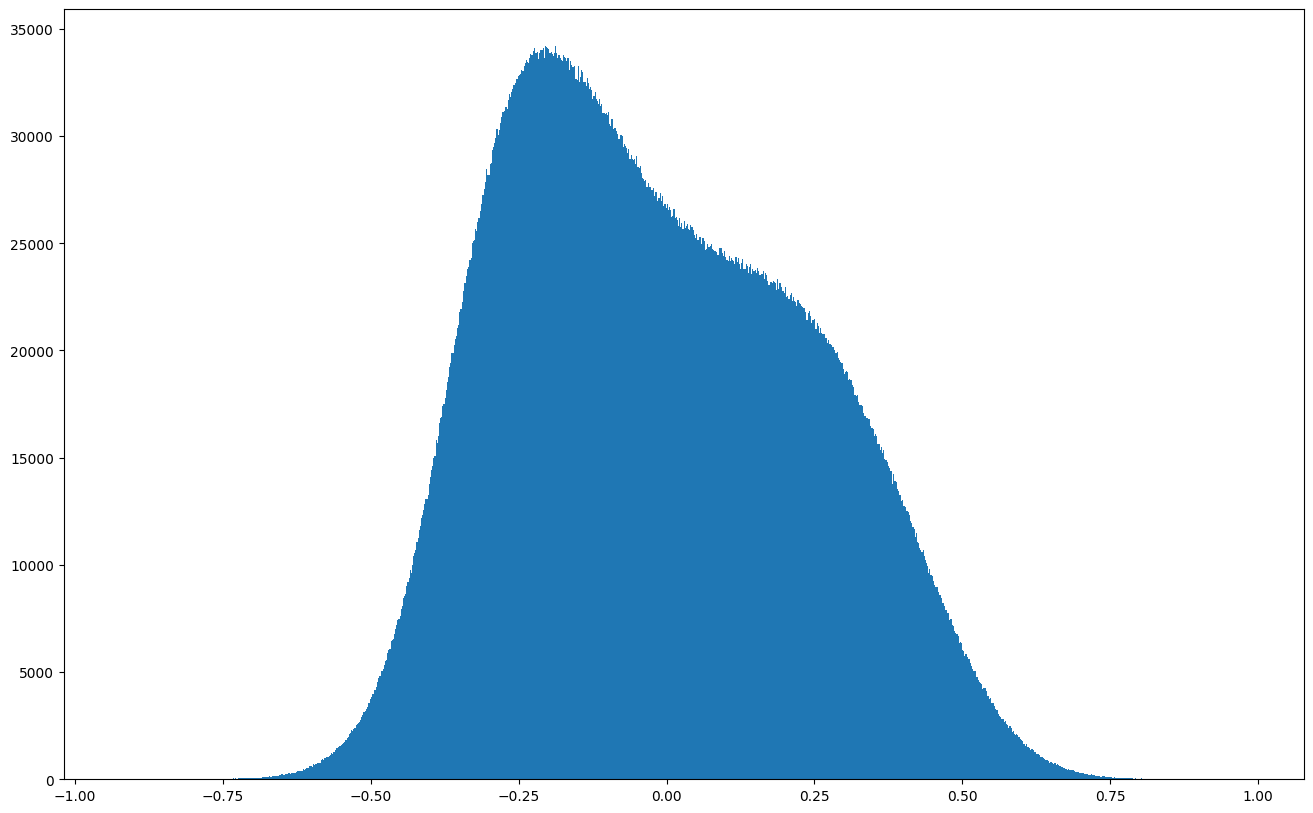

In [22]:
CDM = norm_adj_matrix_1 - norm_adj_matrix_2
# CDM je simetricna matrica, kao i matrice susedstva grafova G1 i G2 
# i zato uzimamo vrednosti iz gornjeg trougla bez glavne dijagonale
upper_indices = np.triu_indices(CDM.shape[0], k=1)
upper_values = CDM[upper_indices]

figure, ax = plt.subplots(nrows=1, ncols=1)
figure.dpi = 100
figure.set_figheight(10)
figure.set_figwidth(16)
_ = ax.hist(upper_values, bins=1000)

In [13]:
def stats_distr(cdm_arr):
    result = stats.anderson(cdm_arr)

    print('Statistic: %.3f' % result.statistic)
    for i in range(len(result.critical_values)):
        sl, cv = result.significance_level[i], result.critical_values[i]
        if result.statistic < cv:
            print('Probably Gaussian at the %.1f%% level' % sl)
        else:
            print('Probably not Gaussian at the %.1f%% level' % sl)

    stats.probplot(cdm_arr, dist="norm", plot=pylab)
    pylab.show()

    data_skewness = skew(cdm_arr)
    print("Skewness: ", data_skewness)

    data_kurtosis = kurtosis(cdm_arr)
    print("Kurtosis: ", data_kurtosis)

In [14]:
class Dissim_metric(enum.Enum):
    EUCLIDIAN = 1
    MANHATTAN = 2
    MINKOWSKI = 3
    COSINE = 4

In [15]:
def plot_dissim_hist(cdm_arr, bins=1000, exp_type="unknown", diss_between="unknown", is_normalized = False):
    figure, ax = plt.subplots(nrows=1, ncols=1)
    figure.dpi = 100
    figure.set_figheight(10)
    figure.set_figwidth(16)

    _ = ax.hist(cdm_arr, bins=bins)
    ax.set_title("Histogram of " + diss_between + " dissimilarity using " + exp_type + " metric")
    if is_normalized:
        ax.set_xlabel("Normalized dissimilarity")
    else:
        ax.set_xlabel("Dissimilarity")
    ax.set_ylabel("Number of cell pairs with specified dissimilarity")

In [16]:
def calc_dissimilarity(arr1, arr2, metric_type):
    if metric_type == Dissim_metric.EUCLIDIAN.value:
        return scipy.spatial.distance.euclidean(arr1, arr2)

    elif metric_type == Dissim_metric.MANHATTAN.value:
        return scipy.spatial.distance.cityblock(arr1, arr2)
        
    elif metric_type == Dissim_metric.MINKOWSKI.value:
        return scipy.spatial.distance.minkowski(arr1, arr2, p=3)
    
    elif metric_type == Dissim_metric.COSINE.value:
        return scipy.spatial.distance.cosine(arr1, arr2)

In [17]:
def create_cdm_array(matrix1, matrix2, metric):
    n = len(matrix1)
    distance_array = np.zeros(n)

    for i in range(0, n):
        distance_array[i] = calc_dissimilarity(matrix1[i,:], matrix2[i,:], metric_type=metric)
    return distance_array

In [18]:
def create_cdm_matrix(matrix1, matrix2, metric):
    n = len(matrix1)
    distance_matrix = np.zeros(shape=(n, n))

    for i in range(0, n):
        for j in range(0, n):
            distance_matrix[i,j] = calc_dissimilarity(matrix1[i,:], matrix2[j,:], metric_type=metric)
    return distance_matrix

In [23]:
cdm_array = {}
for met in Dissim_metric:
    cdm_array[met.name] = create_cdm_array(norm_adj_matrix_1, norm_adj_matrix_2, metric=met.value)

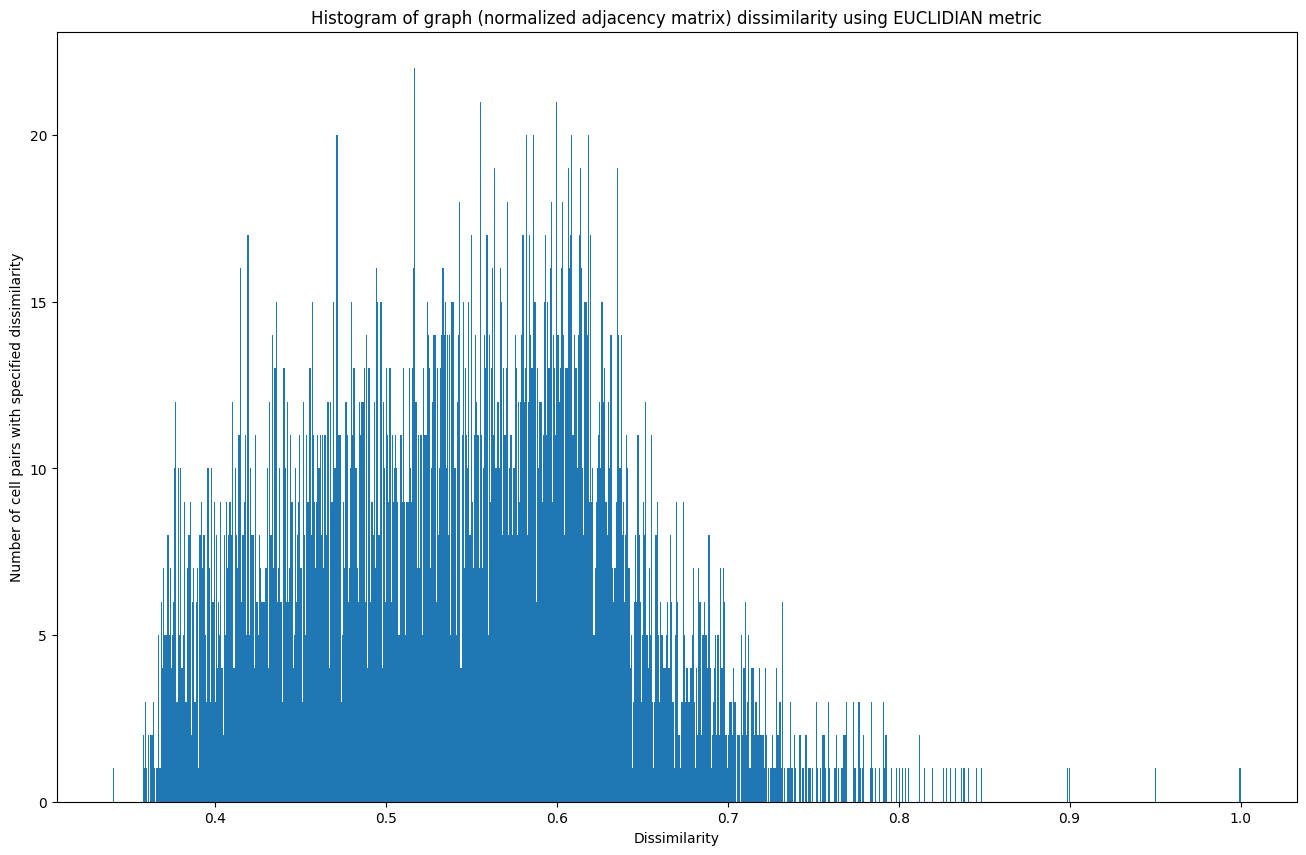

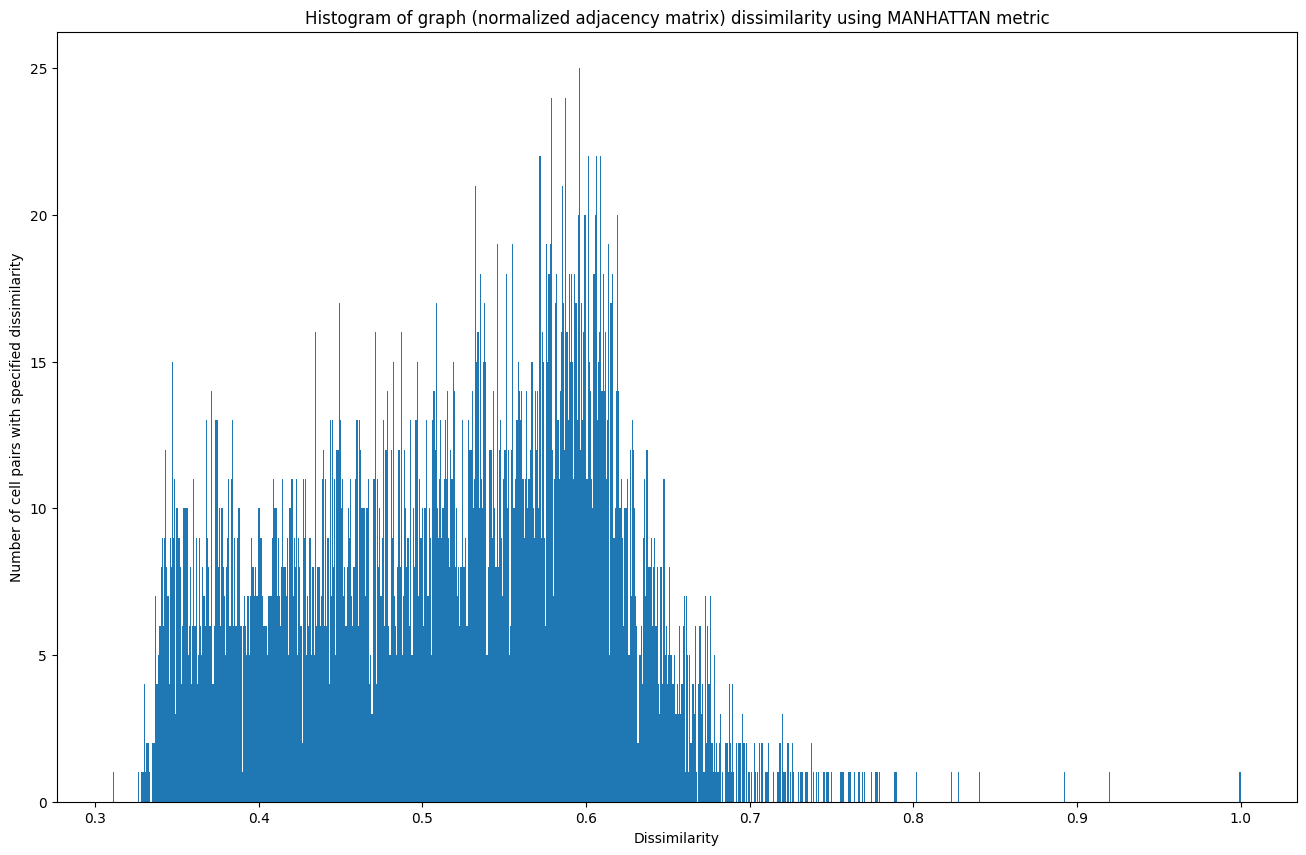

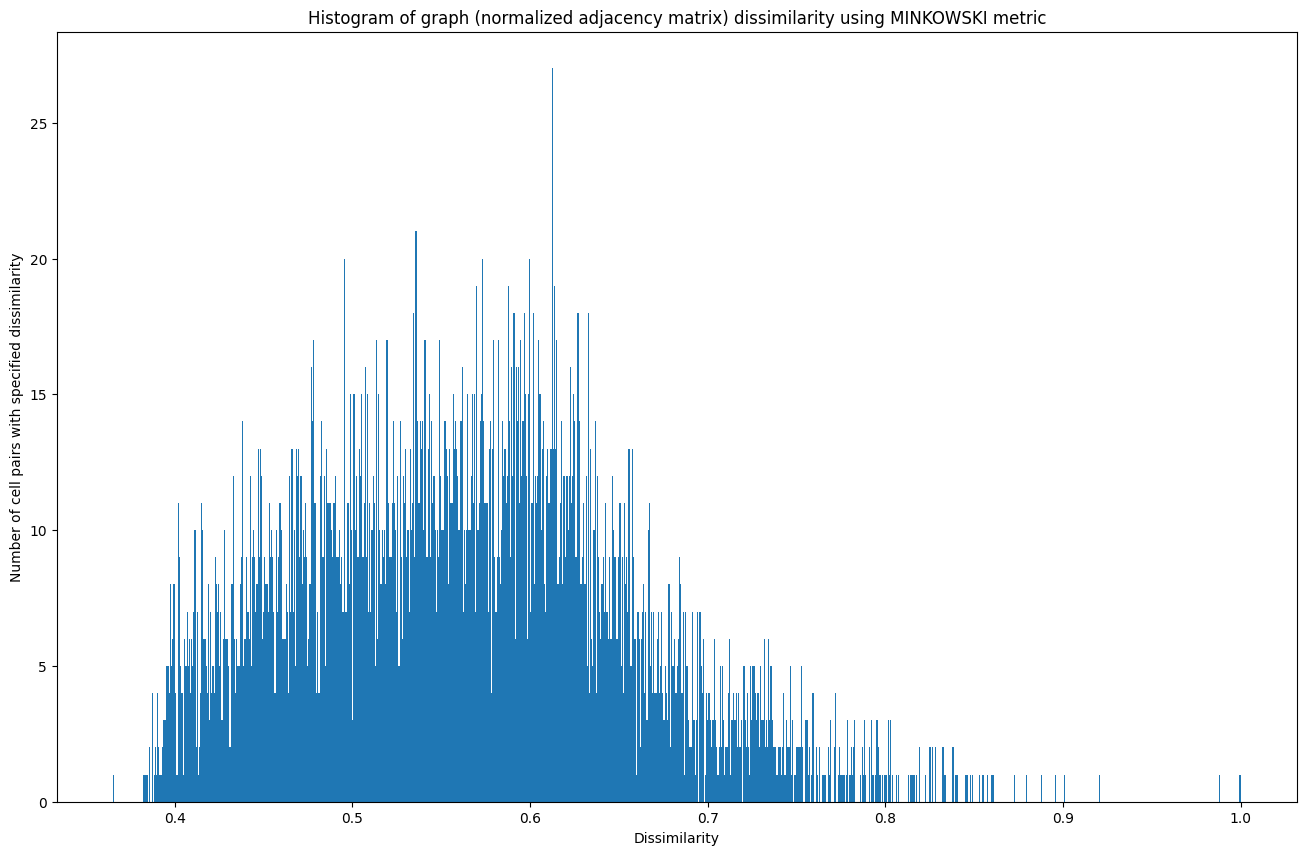

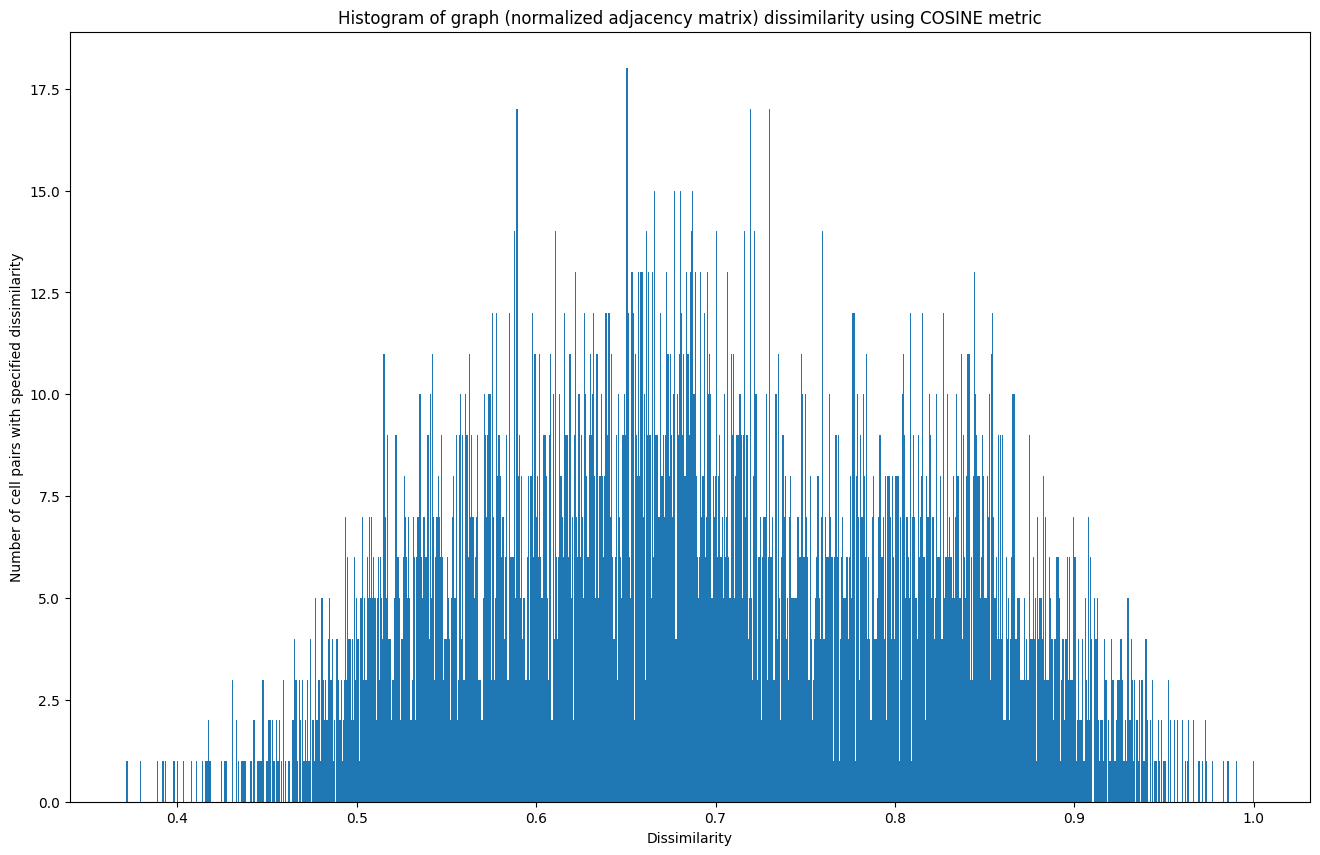

In [24]:
for met in Dissim_metric:
    dissimilarity_array = cdm_array[met.name]
    dissimilarity_array /= np.max(dissimilarity_array)
    plot_dissim_hist(dissimilarity_array, bins=1000, exp_type=met.name, diss_between="graph (normalized adjacency matrix)")

CDM matrica na osnovu matrica susedstva G1 i G2.

In [25]:
cdm_matrix = {}
for met in Dissim_metric:
    cdm_matrix[met.name] = create_cdm_matrix(adjacency_matrix_1, adjacency_matrix_2, metric=met.value)

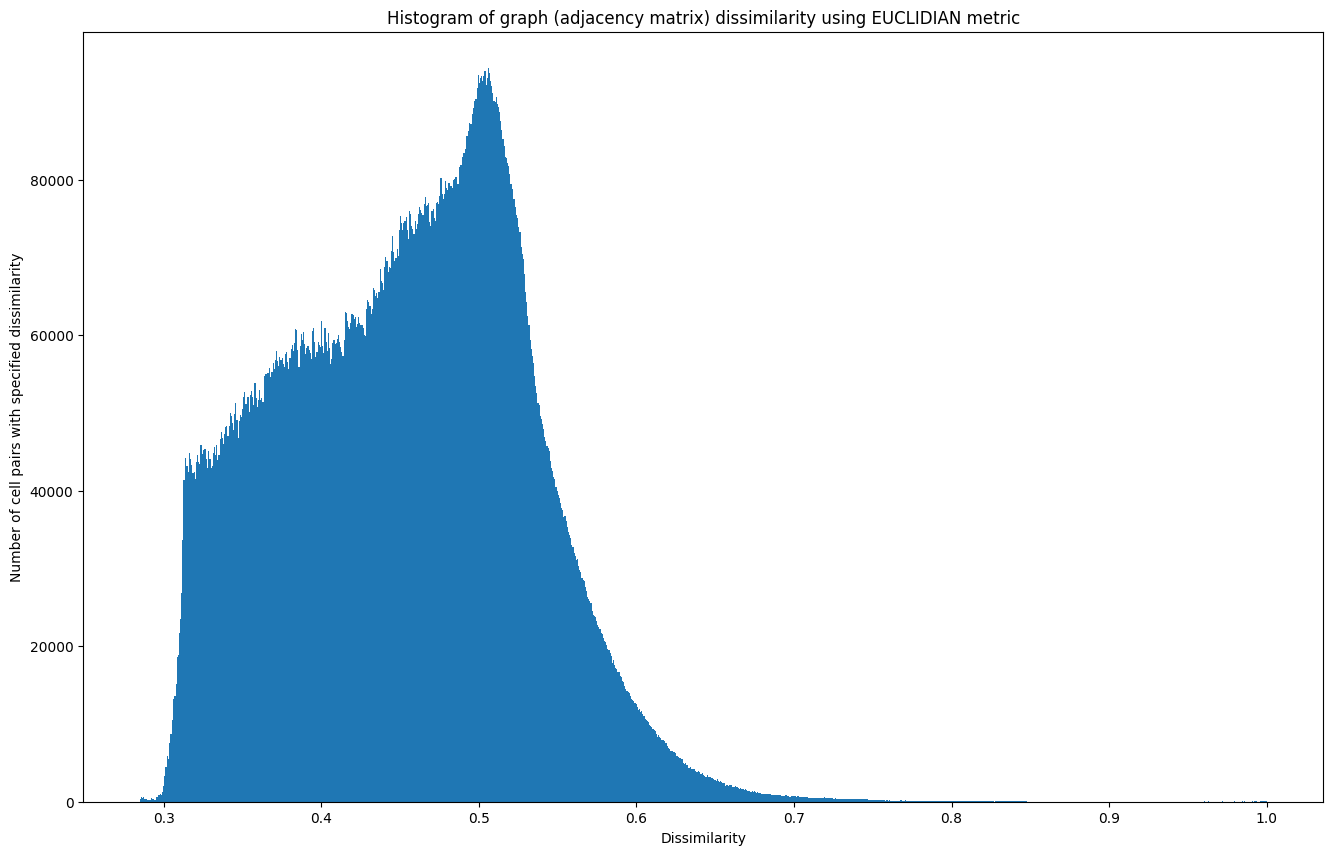

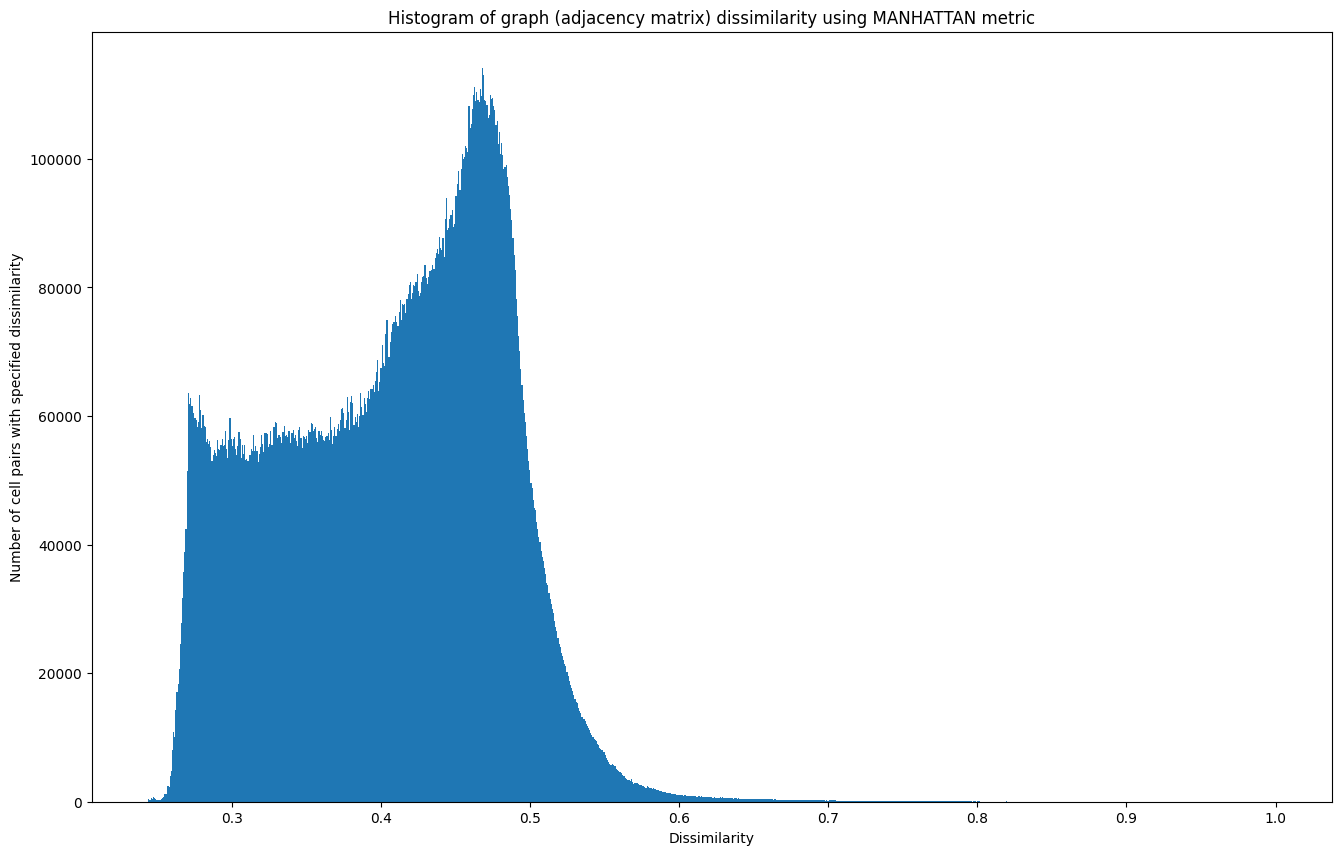

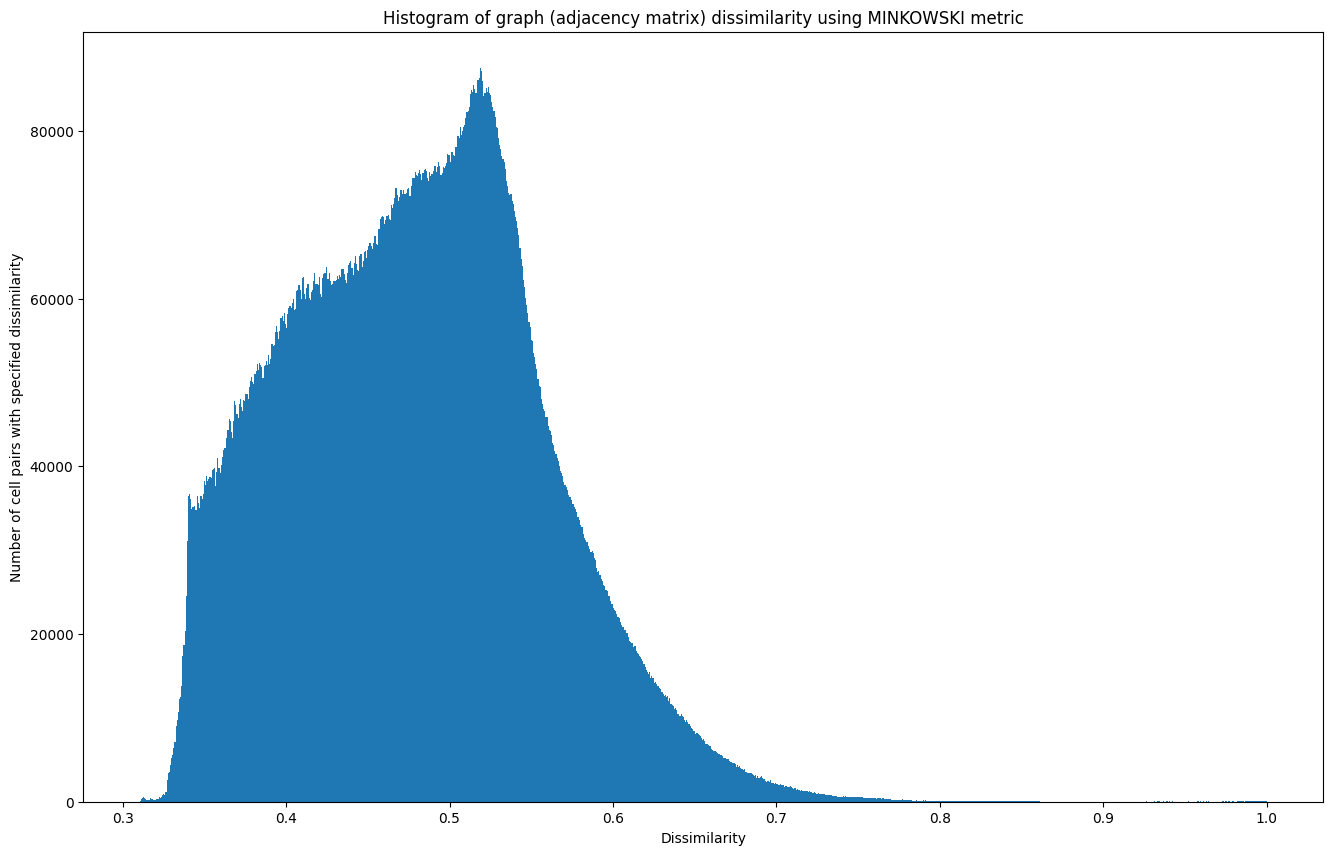

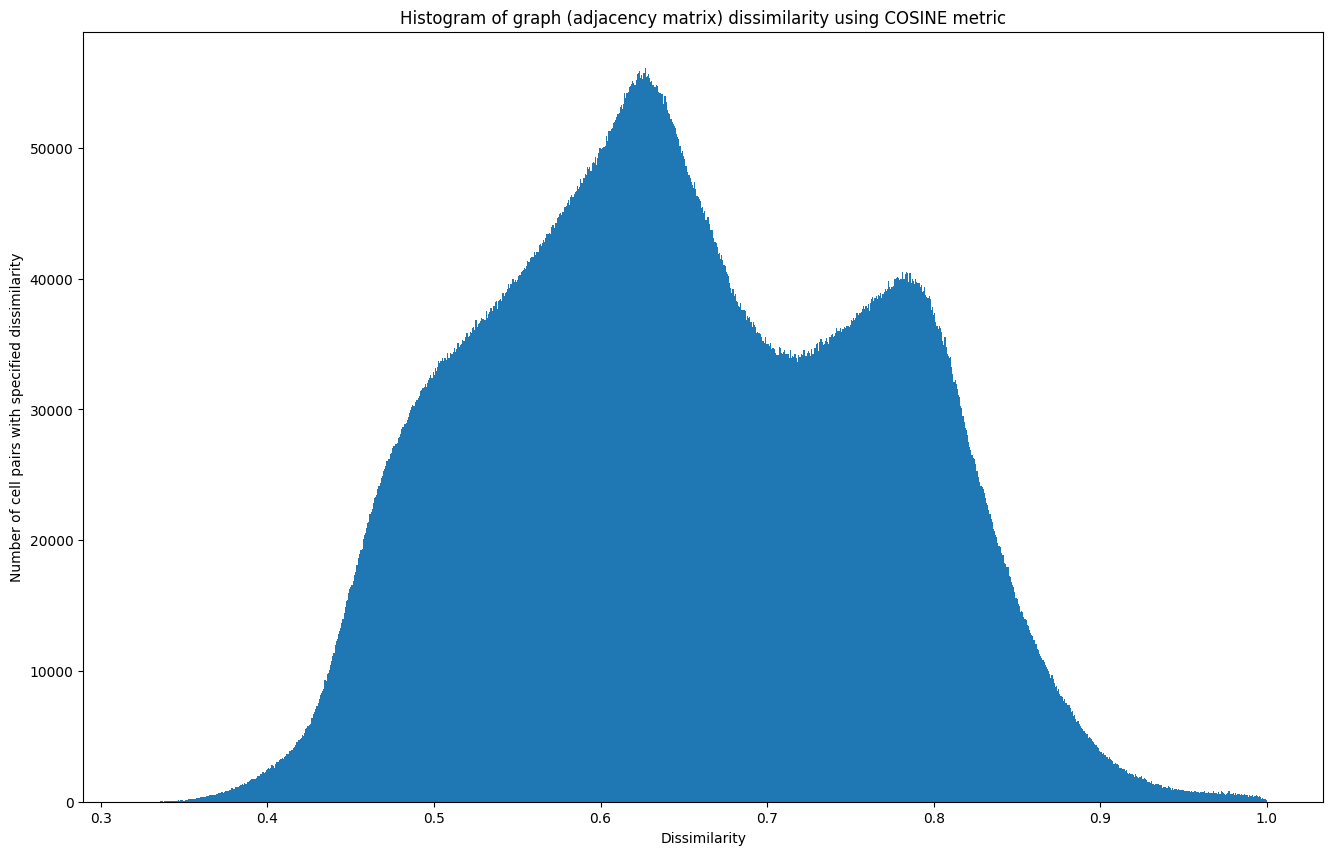

In [26]:
for met in Dissim_metric:
    dissimilarity_array = cdm_matrix[met.name].flatten()
    dissimilarity_array /= np.max(dissimilarity_array)
    plot_dissim_hist(dissimilarity_array, bins=1000, exp_type=met.name, diss_between="graph (adjacency matrix)")

CDM matrica na osnovu normalizovanih matrica susedstva G1 i G2.

In [27]:
cdm_matrix_norm = {}
for met in Dissim_metric:
    cdm_matrix_norm[met.name] = create_cdm_matrix(norm_adj_matrix_1, norm_adj_matrix_2, metric=met.value)

In [33]:
for met in Dissim_metric:
    print(np.array_equal(cdm_matrix_norm[met.name], cdm_matrix[met.name]))

True
True
True
True


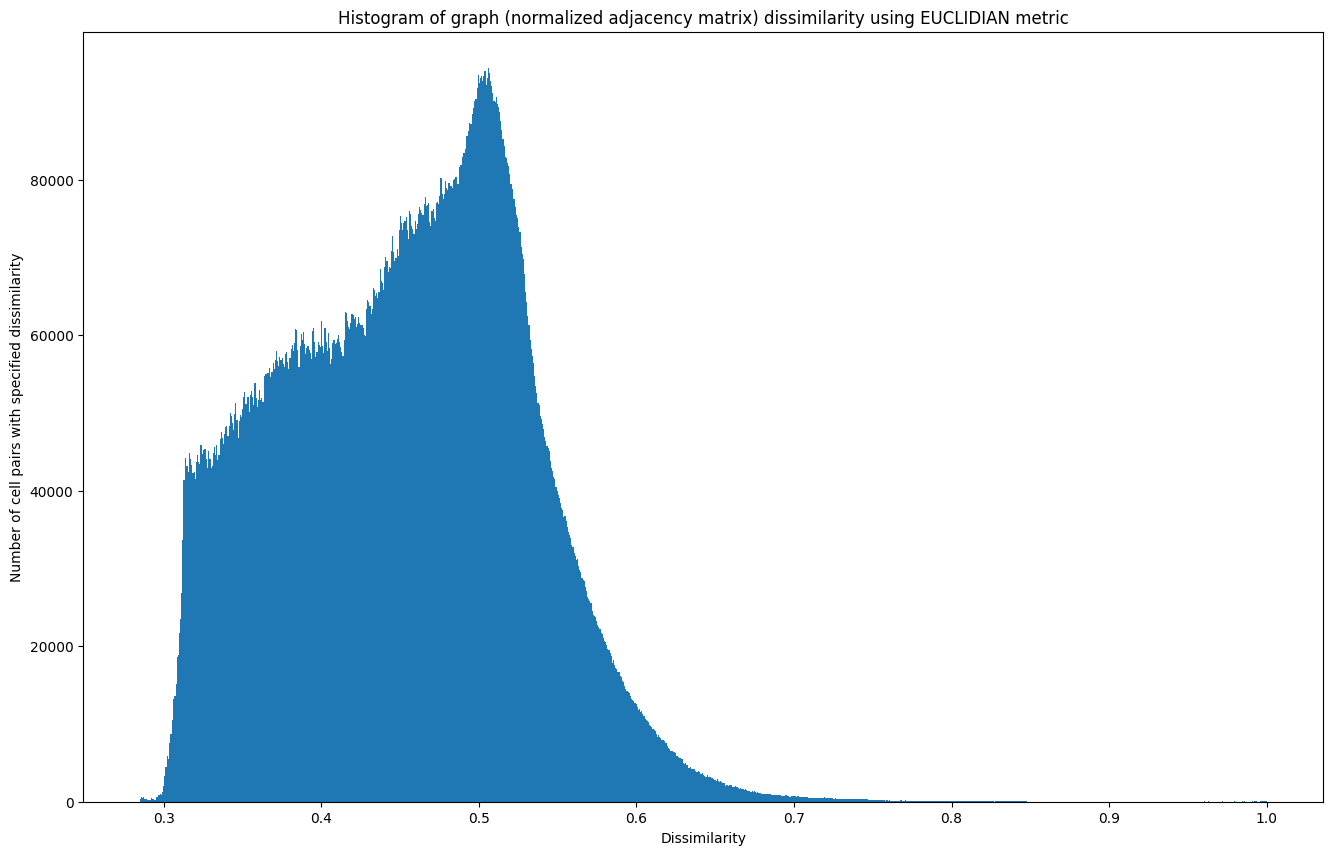

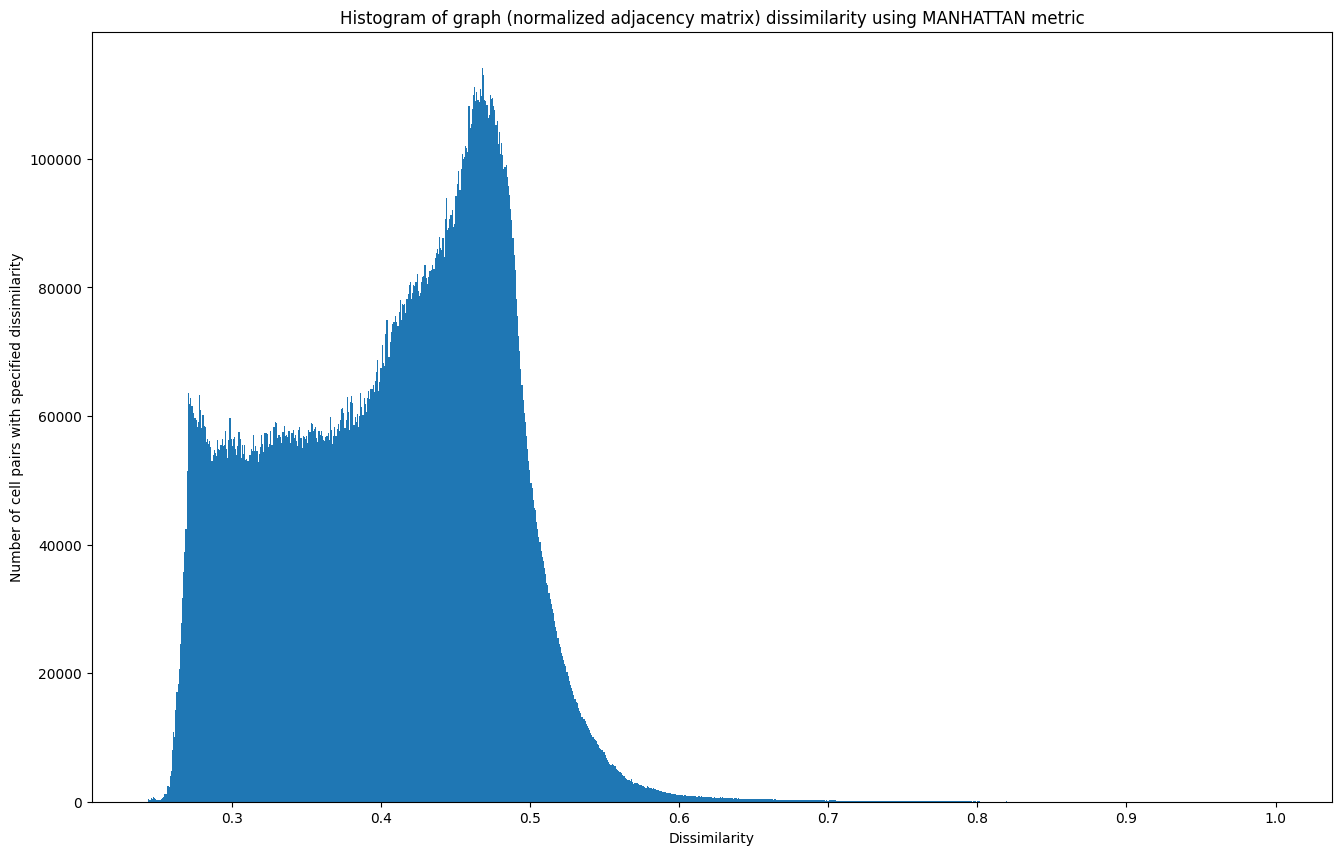

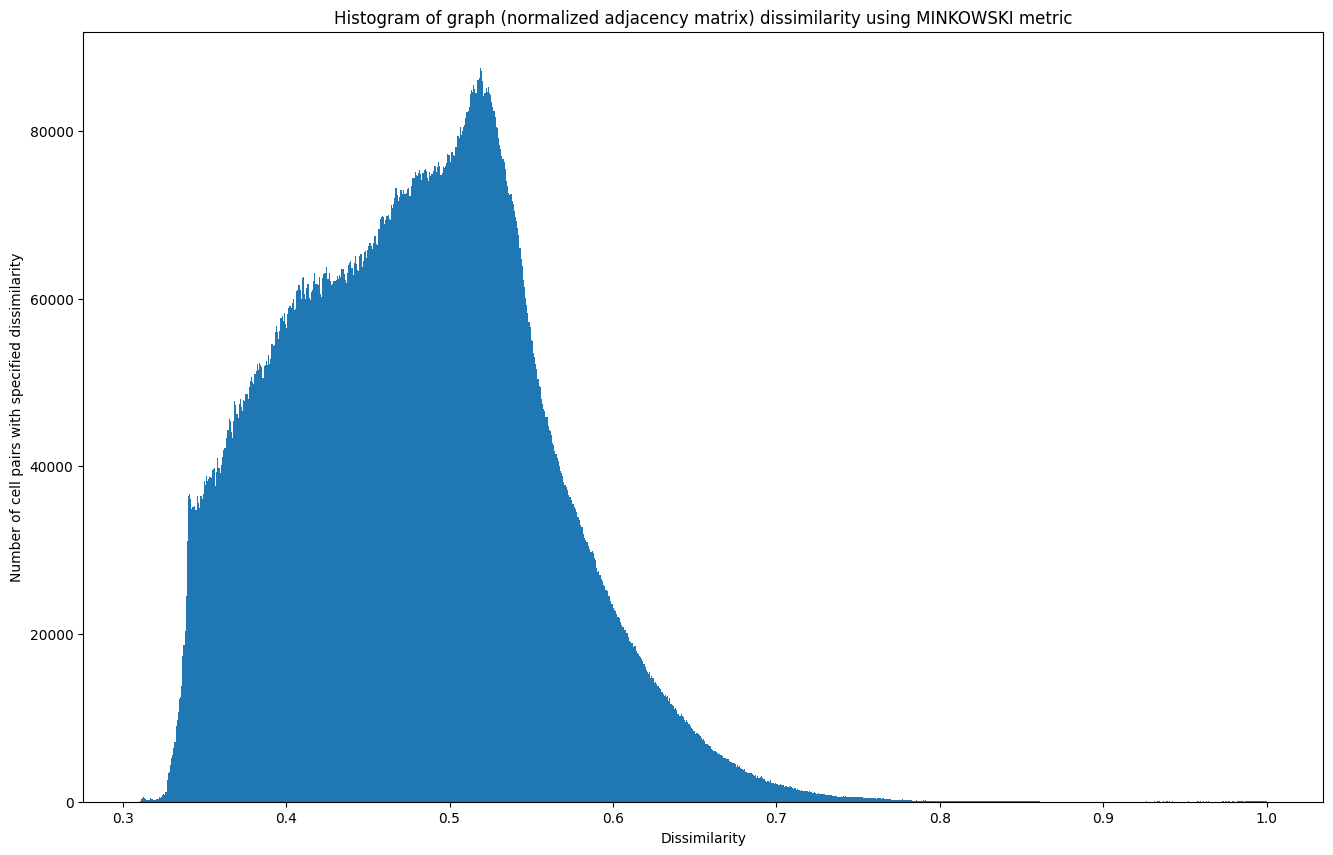

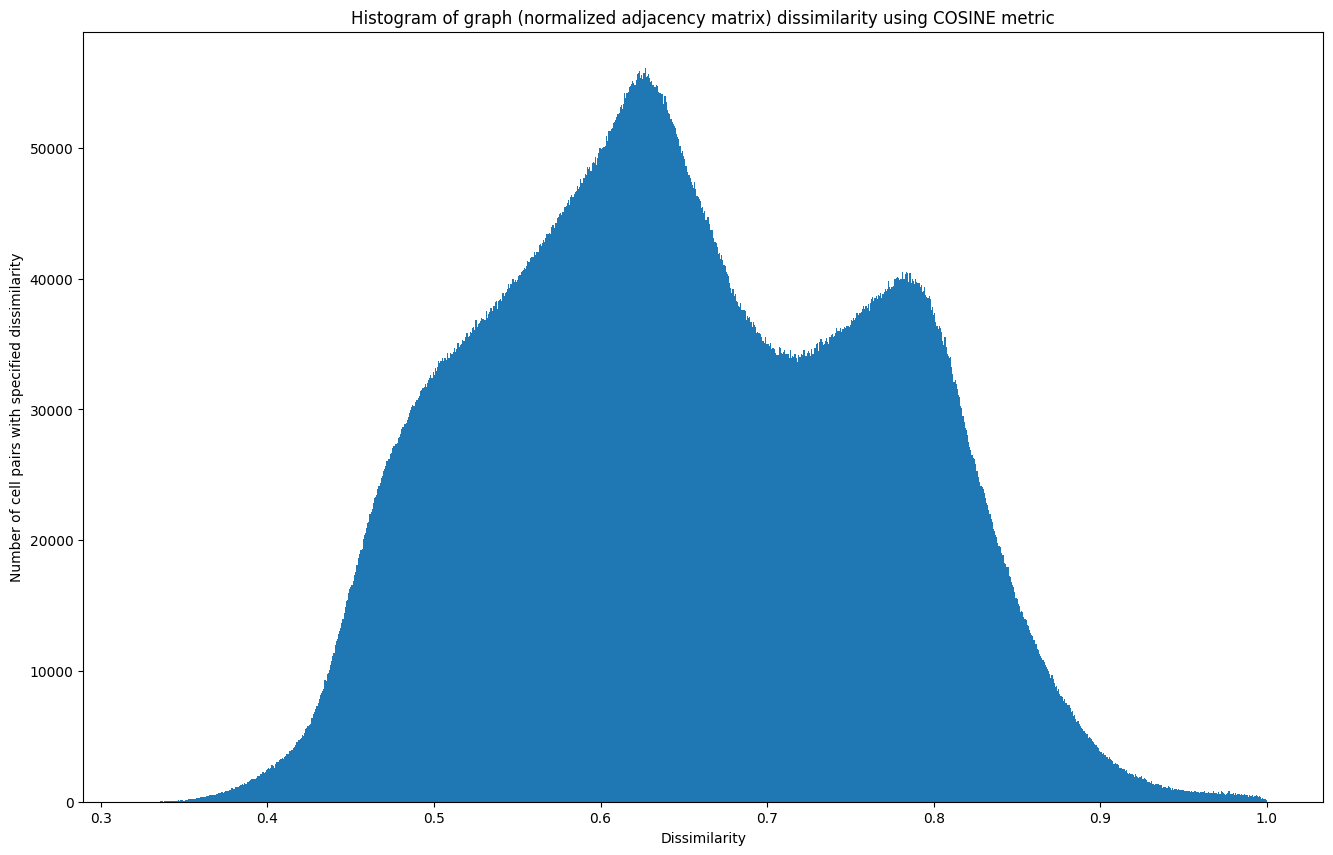

In [28]:
for met in Dissim_metric:
    dissimilarity_array = cdm_matrix_norm[met.name].flatten()
    dissimilarity_array /= np.max(dissimilarity_array)
    plot_dissim_hist(dissimilarity_array, bins=1000, exp_type=met.name, diss_between="graph (normalized adjacency matrix)")

POREDJENJE CELIJA

In [29]:
cells_all_features = {}
for cell in cells:
    list1 = np.array(cell_dict[cell])
    list2 = np.array(reduced_data_dict[cell])
    cells_all_features[cell] = np.concatenate((list1, list2))
cells_all_features

{180224: array([ 2.21190000e+04,  8.37800000e+03,  1.09008060e+00, ...,
        -7.11761581e-02,  5.71862175e-02,  4.17458742e-02]),
 180225: array([ 2.21100000e+04,  6.66600000e+03, -6.23082147e+00, ...,
        -1.02102561e-01,  1.43353691e-01, -8.91126668e-02]),
 180226: array([ 2.21030000e+04,  8.45600000e+03,  2.24217753e+01, ...,
        -1.98558434e-02,  7.20010960e-03,  7.03592962e-02]),
 180227: array([ 2.21160000e+04,  5.38000000e+03, -4.84027127e+00, ...,
        -2.77349927e-03, -5.18669765e-02, -1.32131294e-01]),
 172036: array([ 2.00480000e+04,  9.24800000e+03,  4.94350396e-01, ...,
        -2.41388259e-02,  7.67357038e-02, -5.98192707e-02]),
 180228: array([2.21070000e+04, 5.50300000e+03, 9.47008679e-01, ...,
        2.66015629e-02, 2.35357067e-02, 6.23877499e-03]),
 180229: array([ 2.21100000e+04,  6.44700000e+03, -9.73614851e+00, ...,
         1.15471047e-01,  2.71336854e-01,  4.44320831e-02]),
 180230: array([ 2.21160000e+04,  7.63800000e+03, -8.91675157e-01, ...,
   

In [30]:
def create_diss_matrix_comparing_cells(cell_dict, cells, metric):
    n = len(cell_dict)
    distance_matrix = np.zeros(shape=(n, n))

    for i in range(0, n):
        for j in range(0, n):
            distance_matrix[i,j] = calc_dissimilarity(cell_dict[cells[i]], cell_dict[cells[j]], metric_type=metric)
    return distance_matrix

Poredjenje celija na osnovu genskih ekspresija.

In [31]:
diss_gene_matrix = {}
for met in Dissim_metric:
    diss_gene_matrix[met.name] = create_diss_matrix_comparing_cells(reduced_data_dict, cells, metric=met.value)

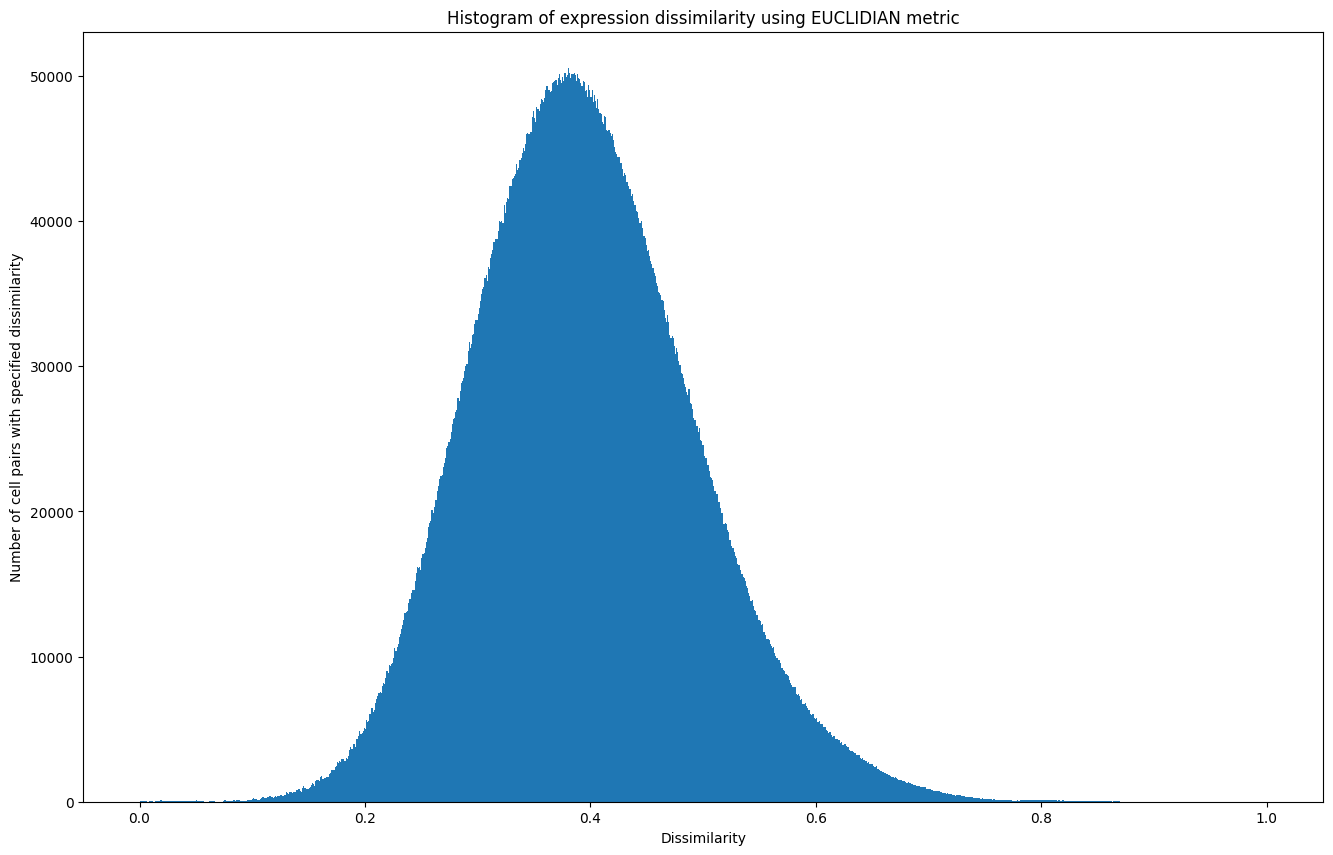

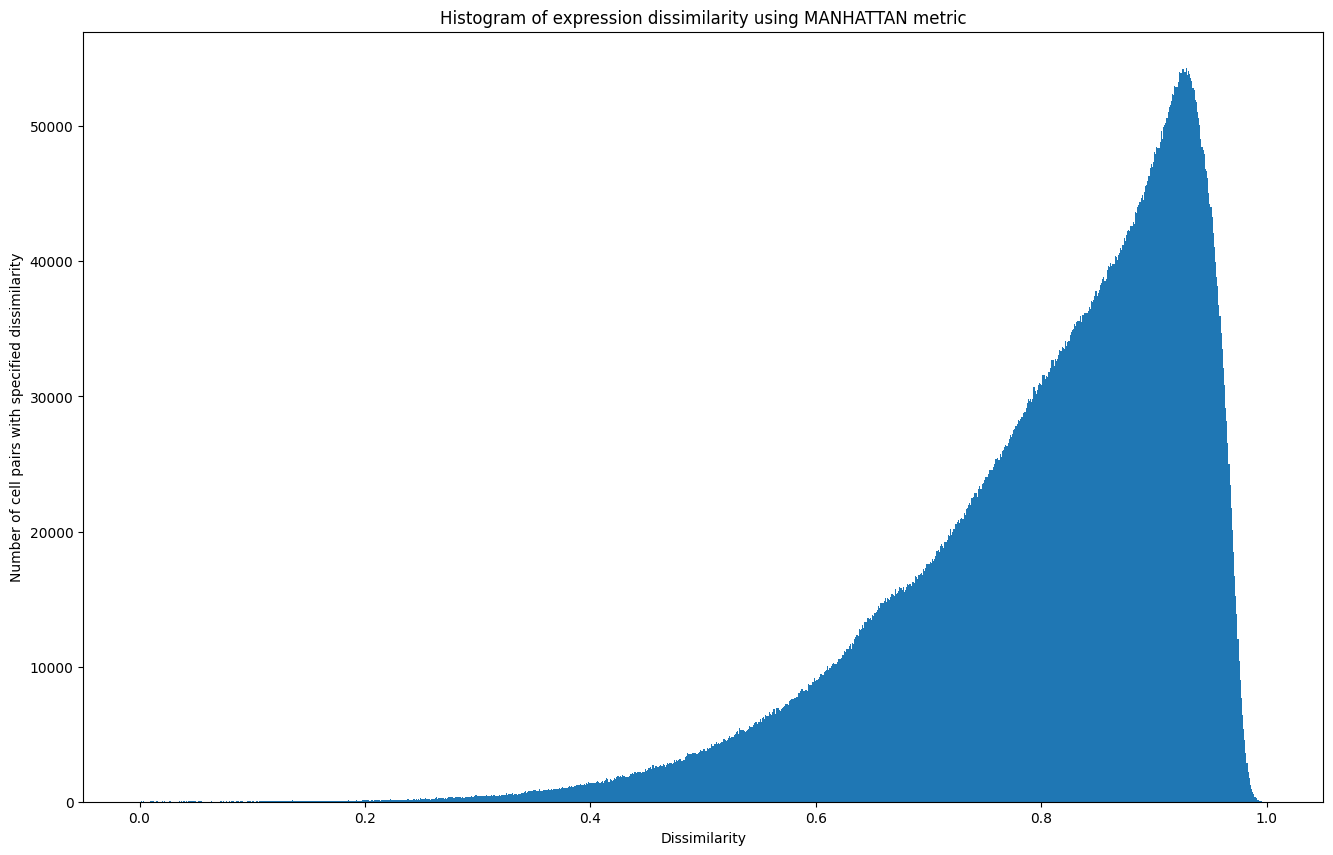

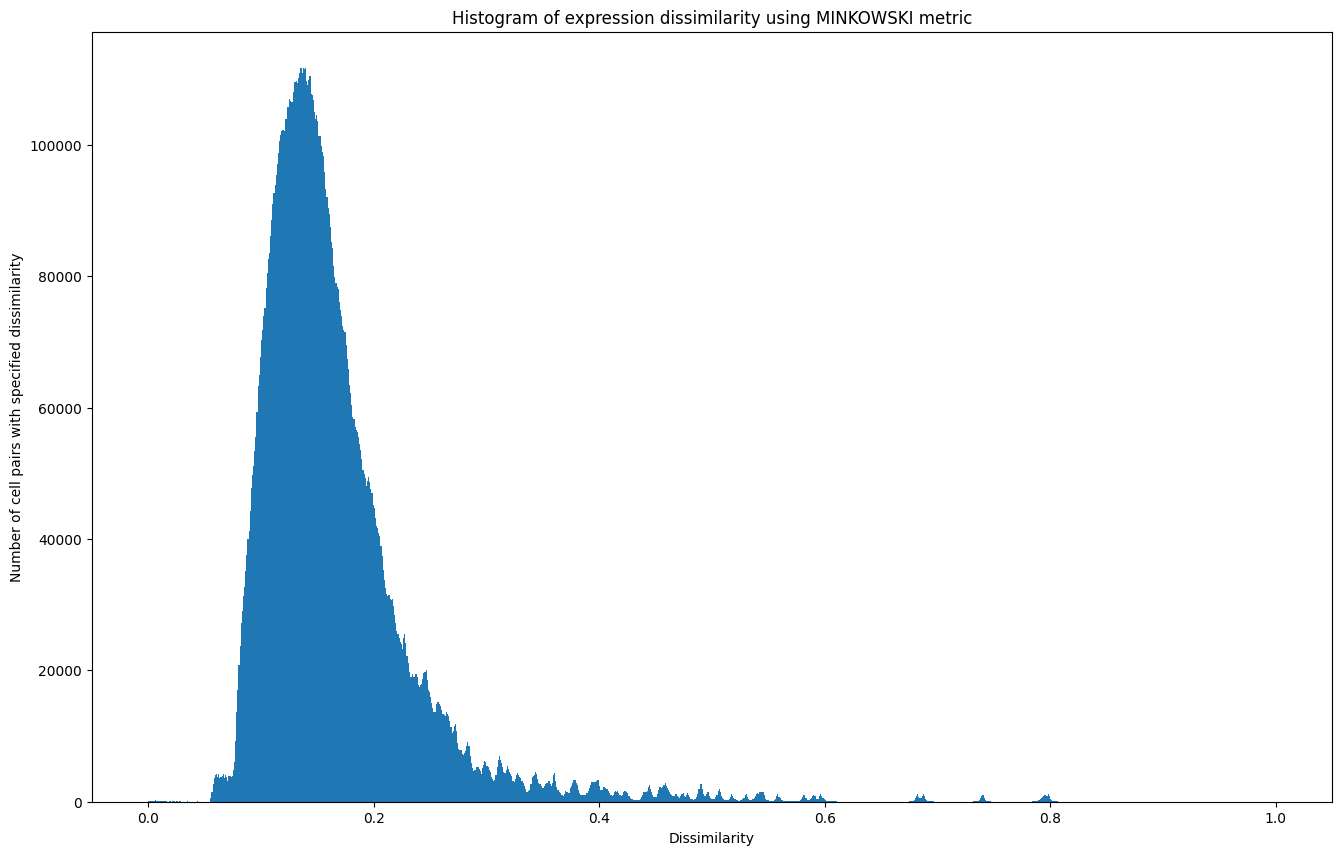

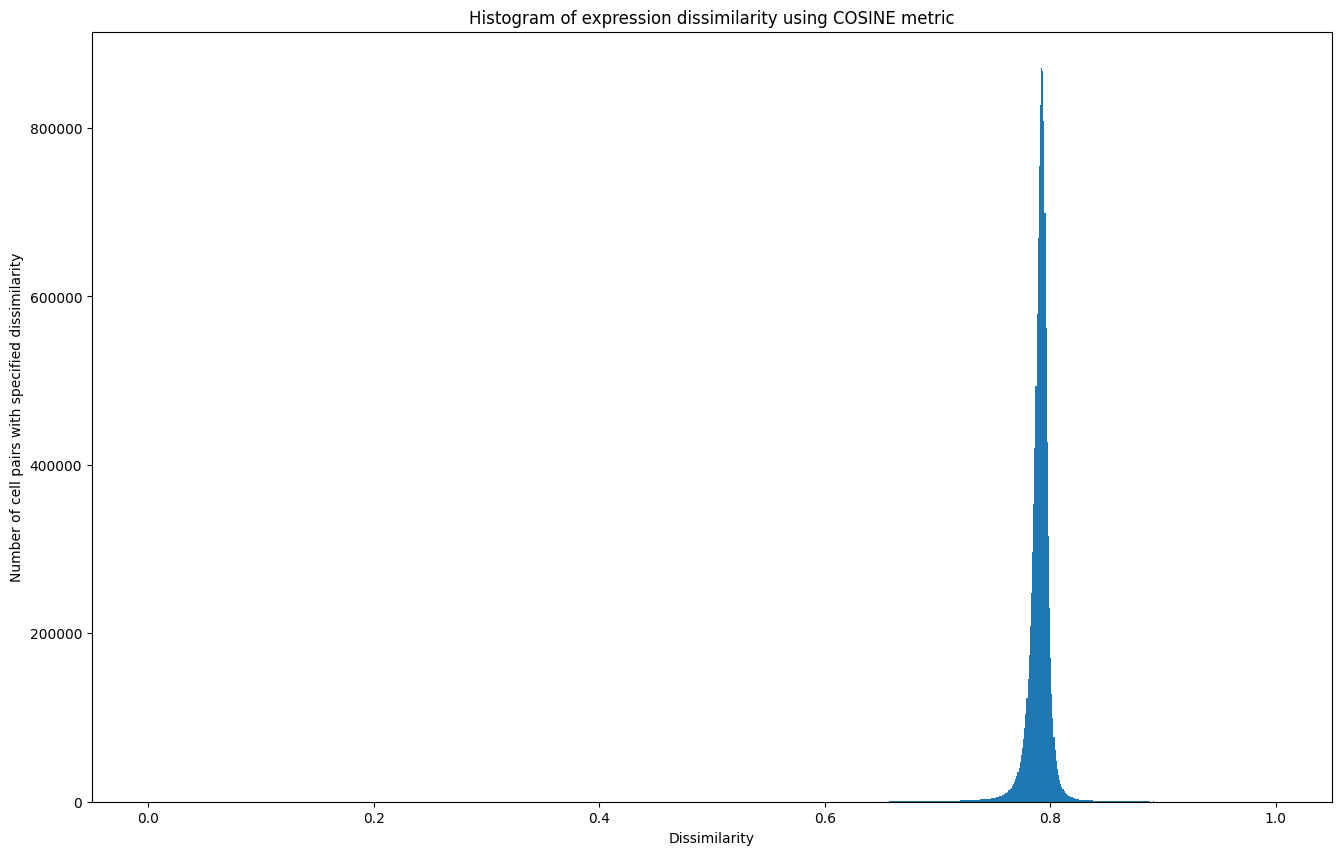

In [32]:
for met in Dissim_metric:
    upper_indices = np.triu_indices(diss_gene_matrix[met.name].shape[0], k=1)
    dissimilarity_array = diss_gene_matrix[met.name][upper_indices]
    dissimilarity_array /= np.max(dissimilarity_array)
    plot_dissim_hist(dissimilarity_array, bins=1000, exp_type=met.name, diss_between="expression")